In [1]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.tokenize.casual import casual_tokenize
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.manifold import TSNE

In [4]:
df = pd.read_csv('/content/tescostores_tweets.csv', low_memory=False)

In [5]:
df.hashtags = df.hashtags.map(lambda x: eval(x))\
.map(lambda x: ['#' + tag for tag in x])

In [6]:
Tesco_df = df[['tweet', 'hashtags']].reset_index(drop = True)

In [7]:
Tesco_before_cleaning = Tesco_df.copy()

Data Cleaning

In [8]:
#Before Cleaning
print('Tesco_before_cleaning:')
print('=============')

Tesco_before_cleaning.tweet[22]



Tesco_before_cleaning:


'@MisrememberedY @FreddieCampion When I was working on the tills at Tesco I have no problem recollecting serving David Soul, Alvin Stardust and Julie Hesmondhalgh. And that would have been about 20 years ago.. I’m sure the waiting staff would remember serving the Duke of York….'

In [9]:
print('10 randomly selected Tweets Before cleaning:')
print('=============')
print(Tesco_before_cleaning['tweet'][33])
print(Tesco_before_cleaning['tweet'][56])
print(Tesco_before_cleaning['tweet'][190])
print(Tesco_before_cleaning['tweet'][153])
print(Tesco_before_cleaning['tweet'][165])
print(Tesco_before_cleaning['tweet'][613])
print(Tesco_before_cleaning['tweet'][134])
print(Tesco_before_cleaning['tweet'][153])
print(Tesco_before_cleaning['tweet'][163])
print(Tesco_before_cleaning['tweet'][166])

10 randomly selected Tweets Before cleaning:
@CaitNoone Cheers Cait .. Tesco had some today too.  Happy New year to you !
@FionaAnnCummins Every knothole helps...oh wait... that's Tesco...
@scottmcg88 That awkward smile when wee deid Peter turns up alive in Tesco three months later
For anyone it helps:  Big Tesco isn’t 24 hours anymore. 😔
Tesco Mobile quietly scraps free EU roaming from 2023 as networks cash in post-Brexit  https://t.co/7GOaqf9DYx
@OxfordMedic @villashonner @FrasierHarry @Tesco …does it though…really..?
@swanblack404 Thanks for bringing this to light. My ex used to work high up for an animal charity and said cows were being kept up to their knees in poo. And RSPCA, the Tesco of animal charities allegedly (I haven't checked) have millions sitting in a bank but the media don't say anything.
For anyone it helps:  Big Tesco isn’t 24 hours anymore. 😔
@misslauralou @Grant_Colgate Could be a tesco near by 😆
@seymourjames3 @tescomobile Thanks, Jim. Utterly useless shower of ch

In [10]:
'''Remove all links, all @s, convert to lower case, remove all hashtags'''
Tesco_before_cleaning.tweet = Tesco_before_cleaning.tweet.map(lambda x: re.sub(r"http\S+", '', x))\
.map(lambda x: re.sub(r"@\S+", '', x))\
.map(lambda x: x.lower())

Tesco_before_cleaning['tweet'] = Tesco_before_cleaning.apply(lambda x: [word for word in x['tweet'].split() if word not in x['hashtags']], axis =1)\
.map(lambda x: ' '.join(x))

Tesco_before_cleaning = Tesco_before_cleaning.drop(columns = ['hashtags'])

'''remove words containing numbers, remove words starting with underscore, and nonenglish characters'''
Tesco_before_cleaning.tweet = Tesco_before_cleaning.tweet.map(lambda word: re.sub('\w*\d\w*', '', word))\
.map(lambda word: re.sub(r"_\S+", '', word))\
.map(lambda word: re.sub('[^a-zA-Z ]+', '', word))

In [11]:
Tesco_After_cleaning = Tesco_before_cleaning.copy()

In [12]:
print('Tesco_After_cleaning:')
print('=============')

Tesco_before_cleaning.tweet[22]

Tesco_After_cleaning:


'when i was working on the tills at tesco i have no problem recollecting serving david soul alvin stardust and julie hesmondhalgh and that would have been about  years ago im sure the waiting staff would remember serving the duke of york'

In [13]:
print('10 randomly selected Tweets After cleaning:')
print('=============')
print(Tesco_After_cleaning['tweet'][33])
print(Tesco_After_cleaning['tweet'][56])
print(Tesco_After_cleaning['tweet'][190])
print(Tesco_After_cleaning['tweet'][153])
print(Tesco_After_cleaning['tweet'][165])
print(Tesco_After_cleaning['tweet'][613])
print(Tesco_After_cleaning['tweet'][134])
print(Tesco_After_cleaning['tweet'][153])
print(Tesco_After_cleaning['tweet'][163])
print(Tesco_After_cleaning['tweet'][166])

10 randomly selected Tweets After cleaning:
cheers cait  tesco had some today too happy new year to you 
every knothole helpsoh wait thats tesco
that awkward smile when wee deid peter turns up alive in tesco three months later
for anyone it helps big tesco isnt  hours anymore 
tesco mobile quietly scraps free eu roaming from  as networks cash in postbrexit
does it thoughreally
thanks for bringing this to light my ex used to work high up for an animal charity and said cows were being kept up to their knees in poo and rspca the tesco of animal charities allegedly i havent checked have millions sitting in a bank but the media dont say anything
for anyone it helps big tesco isnt  hours anymore 
could be a tesco near by 
thanks jim utterly useless shower of charlatans happy to take the money but no regard for customers ive documented everything if not resolved soon ill be bypassing tesco altogether and taking my issue to the relevant ombudsman so many folk having similar issues so poor


Tokenization of Tweets

In [14]:
import spacy
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.4 MB/s 
✔ Download and installation

In [16]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
!pip install -U pip setuptools wheel
!pip install -U spacy
import spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 31.2 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
nlp=spacy.load('en_core_web_sm')

In [20]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
Tesco_After_cleaning.tweet = Tesco_After_cleaning.tweet.map(lambda message: casual_tokenize(message, reduce_len=True, strip_handles=True))\
.map(lambda message: ' '.join(message))

In [22]:
def lemmatizer(text):
    return ' '.join([word.lemma_ for word in nlp(text)])

In [23]:
Tesco_After_cleaning.tweet=Tesco_After_cleaning.tweet.apply(lemmatizer)

In [24]:
# check this function again, print the 
#for j in range(5):
#    print('10 randomly selected Tweets Before cleaning:')
#    print(Tesco_before_cleaning.tweet[j])
#    print(' ')
#    print('10 randomly selected Tweets After cleaning:')
#    print(Tesco_After_cleaning.tweet[j])
#    print(' ')

Remove stop words

In [25]:
#stop_words=stopwords.words('Cleaned_Tesco_df')
#stop_words.extend(['putin', 'ukraine', 'russia', 'zelensky', 'russian', 'ukrainian'])

In [26]:
from nltk.corpus import stopwords

In [27]:
stop_words=stopwords.words('english')
stop_words.extend(['tesco'])

In [28]:
cv=CountVectorizer(stop_words=stop_words,min_df=20)
dataCV=cv.fit_transform(Tesco_After_cleaning.tweet)
dataCV_df=pd.DataFrame(dataCV.toarray(), columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
New_Tesco=dataCV_df.sum().sort_values(ascending=False)

In [30]:
top15=New_Tesco[:15]

In [31]:
top15

get       4251
go        3445
thank     2377
like      2201
one       2086
see       1942
store     1761
buy       1694
please    1597
say       1569
look      1548
use       1541
would     1537
shop      1536
time      1525
dtype: int64

In [32]:
top15.values

array([4251, 3445, 2377, 2201, 2086, 1942, 1761, 1694, 1597, 1569, 1548,
       1541, 1537, 1536, 1525])

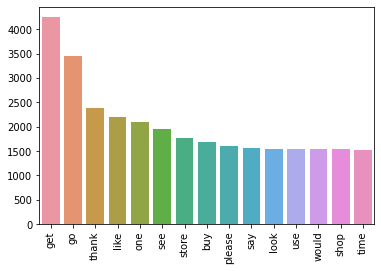

In [33]:
sns.barplot(y=top15.values, x=top15.index)
plt.xticks(rotation=90)
plt.show()

In [34]:
def sent_to_words(sentences):
    for s in sentences:
        yield(simple_preprocess(str(s), deacc=True))

In [35]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [36]:
data=Tesco_After_cleaning.tweet.values.tolist()
tweet_word=list(sent_to_words(data))

In [37]:
tweet_word=remove_stopwords(tweet_word)

In [38]:
import gensim.corpora as corpora

In [39]:
id2word=corpora.Dictionary(tweet_word)

texts=tweet_word

In [40]:
#create a corpus
corpus=[id2word.doc2bow(text) for text in texts]

In [41]:
from pprint import pprint

In [42]:
lda_model=gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=10, random_state=42)

In [43]:
## print keywords in the topics
pprint(lda_model.print_topics())

[(0,
  '0.054*"car" + 0.034*"wash" + 0.025*"extra" + 0.023*"wave" + 0.019*"offer" + '
  '0.017*"park" + 0.012*"special" + 0.011*"hanley" + 0.011*"shop" + '
  '0.011*"stokeontrent"'),
 (1,
  '0.019*"see" + 0.014*"get" + 0.013*"one" + 0.012*"buy" + 0.011*"shop" + '
  '0.010*"big" + 0.008*"think" + 0.007*"try" + 0.007*"go" + 0.007*"next"'),
 (2,
  '0.018*"use" + 0.014*"go" + 0.010*"pay" + 0.008*"get" + 0.008*"leave" + '
  '0.007*"buy" + 0.006*"sainsbury" + 0.005*"shop" + 0.005*"work" + '
  '0.005*"today"'),
 (3,
  '0.043*"thank" + 0.029*"hi" + 0.025*"please" + 0.022*"get" + 0.020*"sorry" + '
  '0.019*"dm" + 0.017*"store" + 0.014*"address" + 0.014*"look" + '
  '0.013*"touch"'),
 (4,
  '0.018*"go" + 0.015*"get" + 0.011*"price" + 0.011*"say" + 0.009*"people" + '
  '0.008*"would" + 0.008*"day" + 0.007*"fuel" + 0.007*"work" + 0.007*"use"'),
 (5,
  '0.018*"like" + 0.013*"get" + 0.011*"go" + 0.010*"deal" + 0.010*"meal" + '
  '0.010*"look" + 0.009*"make" + 0.009*"store" + 0.008*"back" + 0.008*"we

In [44]:
doc_lda=lda_model[corpus]

In [45]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=819b4fef078d70b283ebcc98fcd4abd1bbe0904553a9fd93617d3faefb9fb3e4
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [46]:
# to feed the LDA model into the pyLDAvis instance
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pickle

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [47]:
def get_coherence_and_perplexity(corpus, id2word, texts, max_count,seed):
    
    coh_vec=[]
    per_vec=[]
    for j in range(2, max_count):
        lda_model=gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=j, random_state=seed)
        coh=gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
        coh_vec.append(coh.get_coherence())
        per_vec.append(lda_model.log_perplexity(corpus))
    
    score=pd.DataFrame({
        'Perplexity':per_vec,
        'Coherence':coh_vec,
        'Topic_Count':list(range(2,max_count))
    })
    
    return score

In [48]:
cohr=get_coherence_and_perplexity(corpus, id2word, texts, 21,42)
cohr

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

,Perplexity,Coherence,Topic_Count
0,-8.113690,0.299465,2
1,-8.170301,0.242419,3
2,-8.172007,0.397586,4
3,-8.187473,0.353856,5
4,-8.197026,0.402770,6
5,-8.215890,0.408656,7
6,-8.229496,0.390837,8
7,-8.238541,0.400467,9
8,-8.236383,0.387851,10
9,-8.258916,0.375829,11


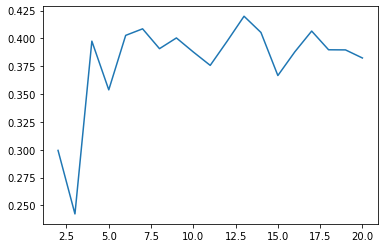

In [49]:
plt.plot(cohr.Topic_Count, cohr.Coherence);

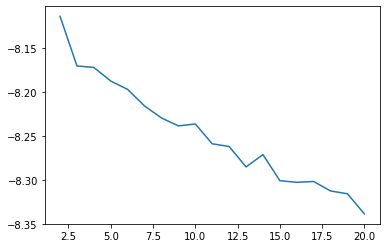

In [50]:
plt.plot(cohr.Topic_Count, cohr.Perplexity);

In [51]:
vis=gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.028391 -0.079432       1        1  13.471930
3     -0.256065 -0.099441       2        1  13.040680
1      0.010701 -0.044067       3        1  12.066910
4      0.056186 -0.069886       4        1  11.443822
9      0.017220 -0.064894       5        1  10.898536
2      0.066640 -0.043895       6        1   9.285640
8      0.127404  0.000813       7        1   8.810087
6      0.090460  0.047602       8        1   8.381672
7      0.027110  0.112821       9        1   6.632945
0     -0.111265  0.240379      10        1   5.967778, topic_info=       Term         Freq        Total Category  logprob  loglift
74      car  1234.000000  1234.000000  Default  30.0000  30.0000
90    thank  2442.000000  2442.000000  Default  29.0000  29.0000
295      hi  1483.000000  1483.000000  Default  28.0000  28.0000
2853   wash   713.000000   713.000000  Default  27.0000  27.0000
258   sorry  1041.000000  1041.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
90    thank    77.174032  2442.654535  Topic10  -5.5963  -0.6360
139     amp    70.871611  1493.837938  Topic10  -5.6815  -0.2294
1418  great    58.639478   481.525002  Topic10  -5.8710   0.7132
21    today    63.231613   949.631741  Topic10  -5.7956   0.1095
290   store    60.520699  1631.920291  Topic10  -5.8394  -0.4757

[794 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1030      1  0.028345    account
1030      2  0.782309    account
1030      3  0.068027    account
1030      4  0.028345    account
1030      5  0.068027    account
...     ...       ...        ...
570       9  0.035180  yesterday
570      10  0.010825  yesterday
4336      3  0.985830         yn
2987      6  0.066587       zero
2987      9  0.910029       zero

[2536 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 5, 10, 3, 9, 7, 8, 1])